In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
%matplotlib inline


In [2]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
# These sets come from the original data set. 
# The shape of train_set_x_orig is (209, 64, 64, 3) means 209pics, every pic contains 
# 64*64*3RGB. 
# The shape of train_set_y is (1, 209)
# Thus the shape of test_set_x and test_set_y are (50, 64, 64, 3) and (1, 50)
# classes[0] is 'cat', classes[1] is 'non-cat'.

y = [0], it's a 'non-cat' picture.


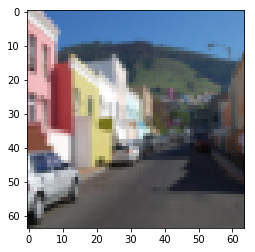

In [4]:
index = 1
plt.imshow(train_set_x_orig[index])ji
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' picture.")

In [5]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
numpx = train_set_x_orig[0].shape[0]
print(str(m_train)+" "+str(m_test)+" "+str(numpx))

209 50 64


In [6]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_orig_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_orig_flatten / 255
print("train_set_x shape:" + str(train_set_x_flatten.shape))
print("test_set_x shape:" + str(test_set_x_orig_flatten.shape))

train_set_x shape:(12288, 209)
test_set_x shape:(12288, 50)


In [7]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s
# the output length is 0-1

In [8]:
print("sigmoid([0, 2]: "+str(sigmoid(np.array([0, 2]))))

sigmoid([0, 2]: [ 0.5         0.88079708]


In [9]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    
    assert (w.shape == (dim, 1))
    assert (isinstance(b, float) or isinstance(b, int))
    
    return w, b

# as we can see, the material pics are reshaped to (num_px, pic_index), thus the
# wT should be (1, num_px), thus we should initialize w as (dim, 1) dim is num_px

In [10]:
dim = 4
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
b = 0


### the forward_propagation fomula are:
  Input X    |   Input w, b   
------------ | ------------- 
Z = w.T * X + b | A = sigmoid(Z)
### the backward_propagation fomula are:
  dJ(cost) / dA | dJ/dZ | dJ/dW |  
------------ | ------------- |--------------|
- 1.0/m *(Y/A -(1- Y)/(1-A)) | -1.0/m * (Y - A)|1.0/m * np.dot(X, (A - Y).T) 
  
	  
**reason**: the shape of w is (num_px, 1), now that we have to calculate dw, the shape of (A - Y) is (1, pic_index)  thus we have to Transpose (A-Y)
the shape of X is (num_px, pic_index) thus we got dw

####                       dJ/db = dz = A - Y  


now we finished computing the forward and backward propagation. X, Y are raw pics (num_px, pic_index)
 the w, b could got from last function

In [11]:

def propagate(w, b, X, Y):
        
    m = X.shape[1]
    Z = np.dot(w.T, X)+b
    A = sigmoid(Z)            # compute activation
    cost = -1.0/m * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))         # compute cost
    
    dw = 1.0/m * np.dot(X, (A - Y).T)
    db = 1.0/m * np.sum(A - Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost




In [12]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))


dw = [[ 0.99993216]
 [ 1.99980262]]
db = 0.499935230625
cost = 6.00006477319


In [13]:
def optimization(w, b, X, Y, num_iterations, learning_rate, print_cost = True):
    costs = []
    for i in range(num_iterations):
        grads, cost= propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    paras = {"w" : w,
             "b" : b}
    grads = {"dw": dw,
             "db": db}
    return paras, grads, costs

            
        
            

In [14]:
params, grads, costs = optimization(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))


w = [[ 0.1124579 ]
 [ 0.23106775]]
b = 1.55930492484
dw = [[ 0.90158428]
 [ 1.76250842]]
db = 0.430462071679


In [15]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X)+b)
    for i in range(A.shape[1]):
        Y_prediction[0,i] = np.rint(A[0, i])
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [16]:
print("prediction = "+str(predict(params["w"], params["b"], X)))

prediction = [[ 1.  1.]]


In [17]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, 
          print_cost = True):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimization(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train": Y_prediction_train, 
         "w": w, 
         "b": b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

        

In [18]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000,
          learning_rate = 0.005, print_cost= True)

Cost after iteration 0: 0.693147


Cost after iteration 100: 0.657208


Cost after iteration 200: 0.634820


Cost after iteration 300: 0.618328


Cost after iteration 400: 0.605556


Cost after iteration 500: 0.595359


Cost after iteration 600: 0.587040


Cost after iteration 700: 0.580138


Cost after iteration 800: 0.574328


Cost after iteration 900: 0.569376


Cost after iteration 1000: 0.565110


Cost after iteration 1100: 0.561395


Cost after iteration 1200: 0.558131


Cost after iteration 1300: 0.555237


Cost after iteration 1400: 0.552651


Cost after iteration 1500: 0.550322


Cost after iteration 1600: 0.548211


Cost after iteration 1700: 0.546283


Cost after iteration 1800: 0.544514


Cost after iteration 1900: 0.542880


train accuracy: 72.7272727273 %
test accuracy: 42.0 %


, you predicted that it is a non-cat picture.


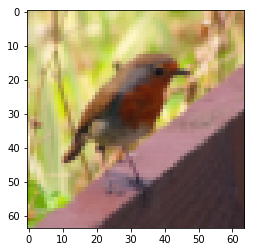

In [187]:
index = 10
plt.imshow(train_set_x_orig[index])
prediction = int(d["Y_prediction_test"][0, index])
print(", you predicted that it is a " + classes[prediction].decode("utf-8") + " picture.")

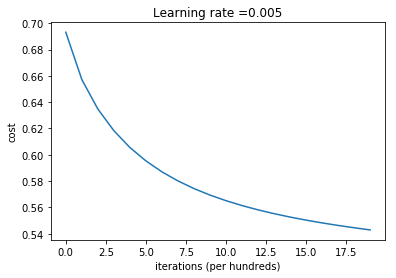

In [145]:
# Example of a picture that was wrongly classified.
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

Cost after iteration 0: 0.693147


Cost after iteration 100: 0.634789


Cost after iteration 200: 0.605526


Cost after iteration 300: 0.587015


Cost after iteration 400: 0.574307


Cost after iteration 500: 0.565092


Cost after iteration 600: 0.558116


Cost after iteration 700: 0.552639


Cost after iteration 800: 0.548201


Cost after iteration 900: 0.544505


Cost after iteration 1000: 0.541356


Cost after iteration 1100: 0.538619


Cost after iteration 1200: 0.536200


Cost after iteration 1300: 0.534033


Cost after iteration 1400: 0.532069


Cost after iteration 1500: 0.530271


Cost after iteration 1600: 0.528613


Cost after iteration 1700: 0.527074


Cost after iteration 1800: 0.525637


Cost after iteration 1900: 0.524290


train accuracy: 73.6842105263 %
test accuracy: 40.0 %
Cost after iteration 0: 0.693147


Cost after iteration 100: 0.683189


Cost after iteration 200: 0.675535


Cost after iteration 300: 0.668839


Cost after iteration 400: 0.662781


Cost after iteration 500: 0.657231


Cost after iteration 600: 0.652105


Cost after iteration 700: 0.647346


Cost after iteration 800: 0.642906


Cost after iteration 900: 0.638749


Cost after iteration 1000: 0.634845


Cost after iteration 1100: 0.631169


Cost after iteration 1200: 0.627699


Cost after iteration 1300: 0.624416


Cost after iteration 1400: 0.621306


Cost after iteration 1500: 0.618353


Cost after iteration 1600: 0.615547


Cost after iteration 1700: 0.612875


Cost after iteration 1800: 0.610329


Cost after iteration 1900: 0.607900


train accuracy: 72.2488038278 %
test accuracy: 42.0 %
Cost after iteration 0: 0.693147


Cost after iteration 100: 0.691938


Cost after iteration 200: 0.690796


Cost after iteration 300: 0.689712


Cost after iteration 400: 0.688677


Cost after iteration 500: 0.687686


Cost after iteration 600: 0.686731


Cost after iteration 700: 0.685808


Cost after iteration 800: 0.684913


Cost after iteration 900: 0.684042


Cost after iteration 1000: 0.683194


Cost after iteration 1100: 0.682365


Cost after iteration 1200: 0.681553


Cost after iteration 1300: 0.680758


Cost after iteration 1400: 0.679976


Cost after iteration 1500: 0.679209


Cost after iteration 1600: 0.678453


Cost after iteration 1700: 0.677709


Cost after iteration 1800: 0.676976


Cost after iteration 1900: 0.676253


train accuracy: 69.8564593301 %
test accuracy: 38.0 %


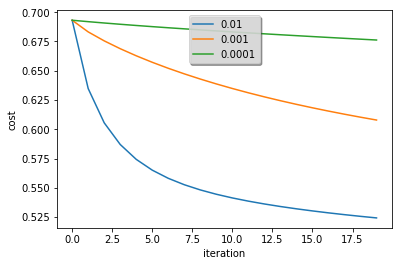

In [180]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, 
            num_iterations=2000, learning_rate=i, print_cost= True)
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label = str(models[str(i)]["learning_rate"]
                                                            ))
    plt.xlabel("iteration_time")
    plt.ylabel("cost")
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor("0.90")
plt.show()